In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
#Read the file
data=pd.read_csv(r"C:\Users\neetac1973\Downloads\readme.txt",error_bad_lines=False)

C:\Users\neetac1973\AppData\Local\Temp\ipykernel_10624\1658797095.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv(r"C:\Users\neetac1973\Downloads\readme.txt",error_bad_lines=False)
b'Skipping line 7: expected 2 fields, saw 6\nSkipping line 9: expected 2 fields, saw 3\nSkipping line 14: expected 2 fields, saw 6\nSkipping line 16: expected 2 fields, saw 5\n'


In [5]:
data

,Amazon Review Polaridy Dataset
Version 3,Updated 09/09/2015
ORIGIN,NaN
DESCRIPTION,NaN


In [6]:
data=pd.DataFrame(data)
data

,Amazon Review Polaridy Dataset
Version 3,Updated 09/09/2015
ORIGIN,NaN
DESCRIPTION,NaN


In [8]:
data = [x.strip() for x in data]#removing blank spaces
data = [x for x in data if x]#removing black lines
data

['Amazon Review Polaridy Dataset']

In [10]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:15]

['Amazon Review Polaridy Dataset']

In [11]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Amazon Review Polaridy Dataset


In [12]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

Amazon      1
Review      1
Polaridy    1
Dataset     1
dtype: int64

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neetac1973\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neetac1973\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [17]:
sent_df['sentence1']

0    Amazon Review Polaridy Dataset
Name: sentence1, dtype: object

In [18]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))
sent_df

,sentence,sentence1,clean
0,Amazon Review Polaridy Dataset,Amazon Review Polaridy Dataset,Amazon Review Polaridy Dataset


In [19]:
sent_df=sent_df.drop('sentence',axis=1)
sent_df=sent_df.drop('sentence1',axis=1)
sent_df

,clean
0,Amazon Review Polaridy Dataset


In [23]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0    4
Name: word_count, dtype: int64

In [25]:
sent_df['index']=range(0,len(sent_df))
sent_df

,clean,word_count,index
0,Amazon Review Polaridy Dataset,4,0


In [48]:
##Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
# Joining the list into one string/text
text = ' '.join(data)

In [49]:
text

'total speeding alcohol not_distracted no_previous ins_premium ins_losses abbrev'

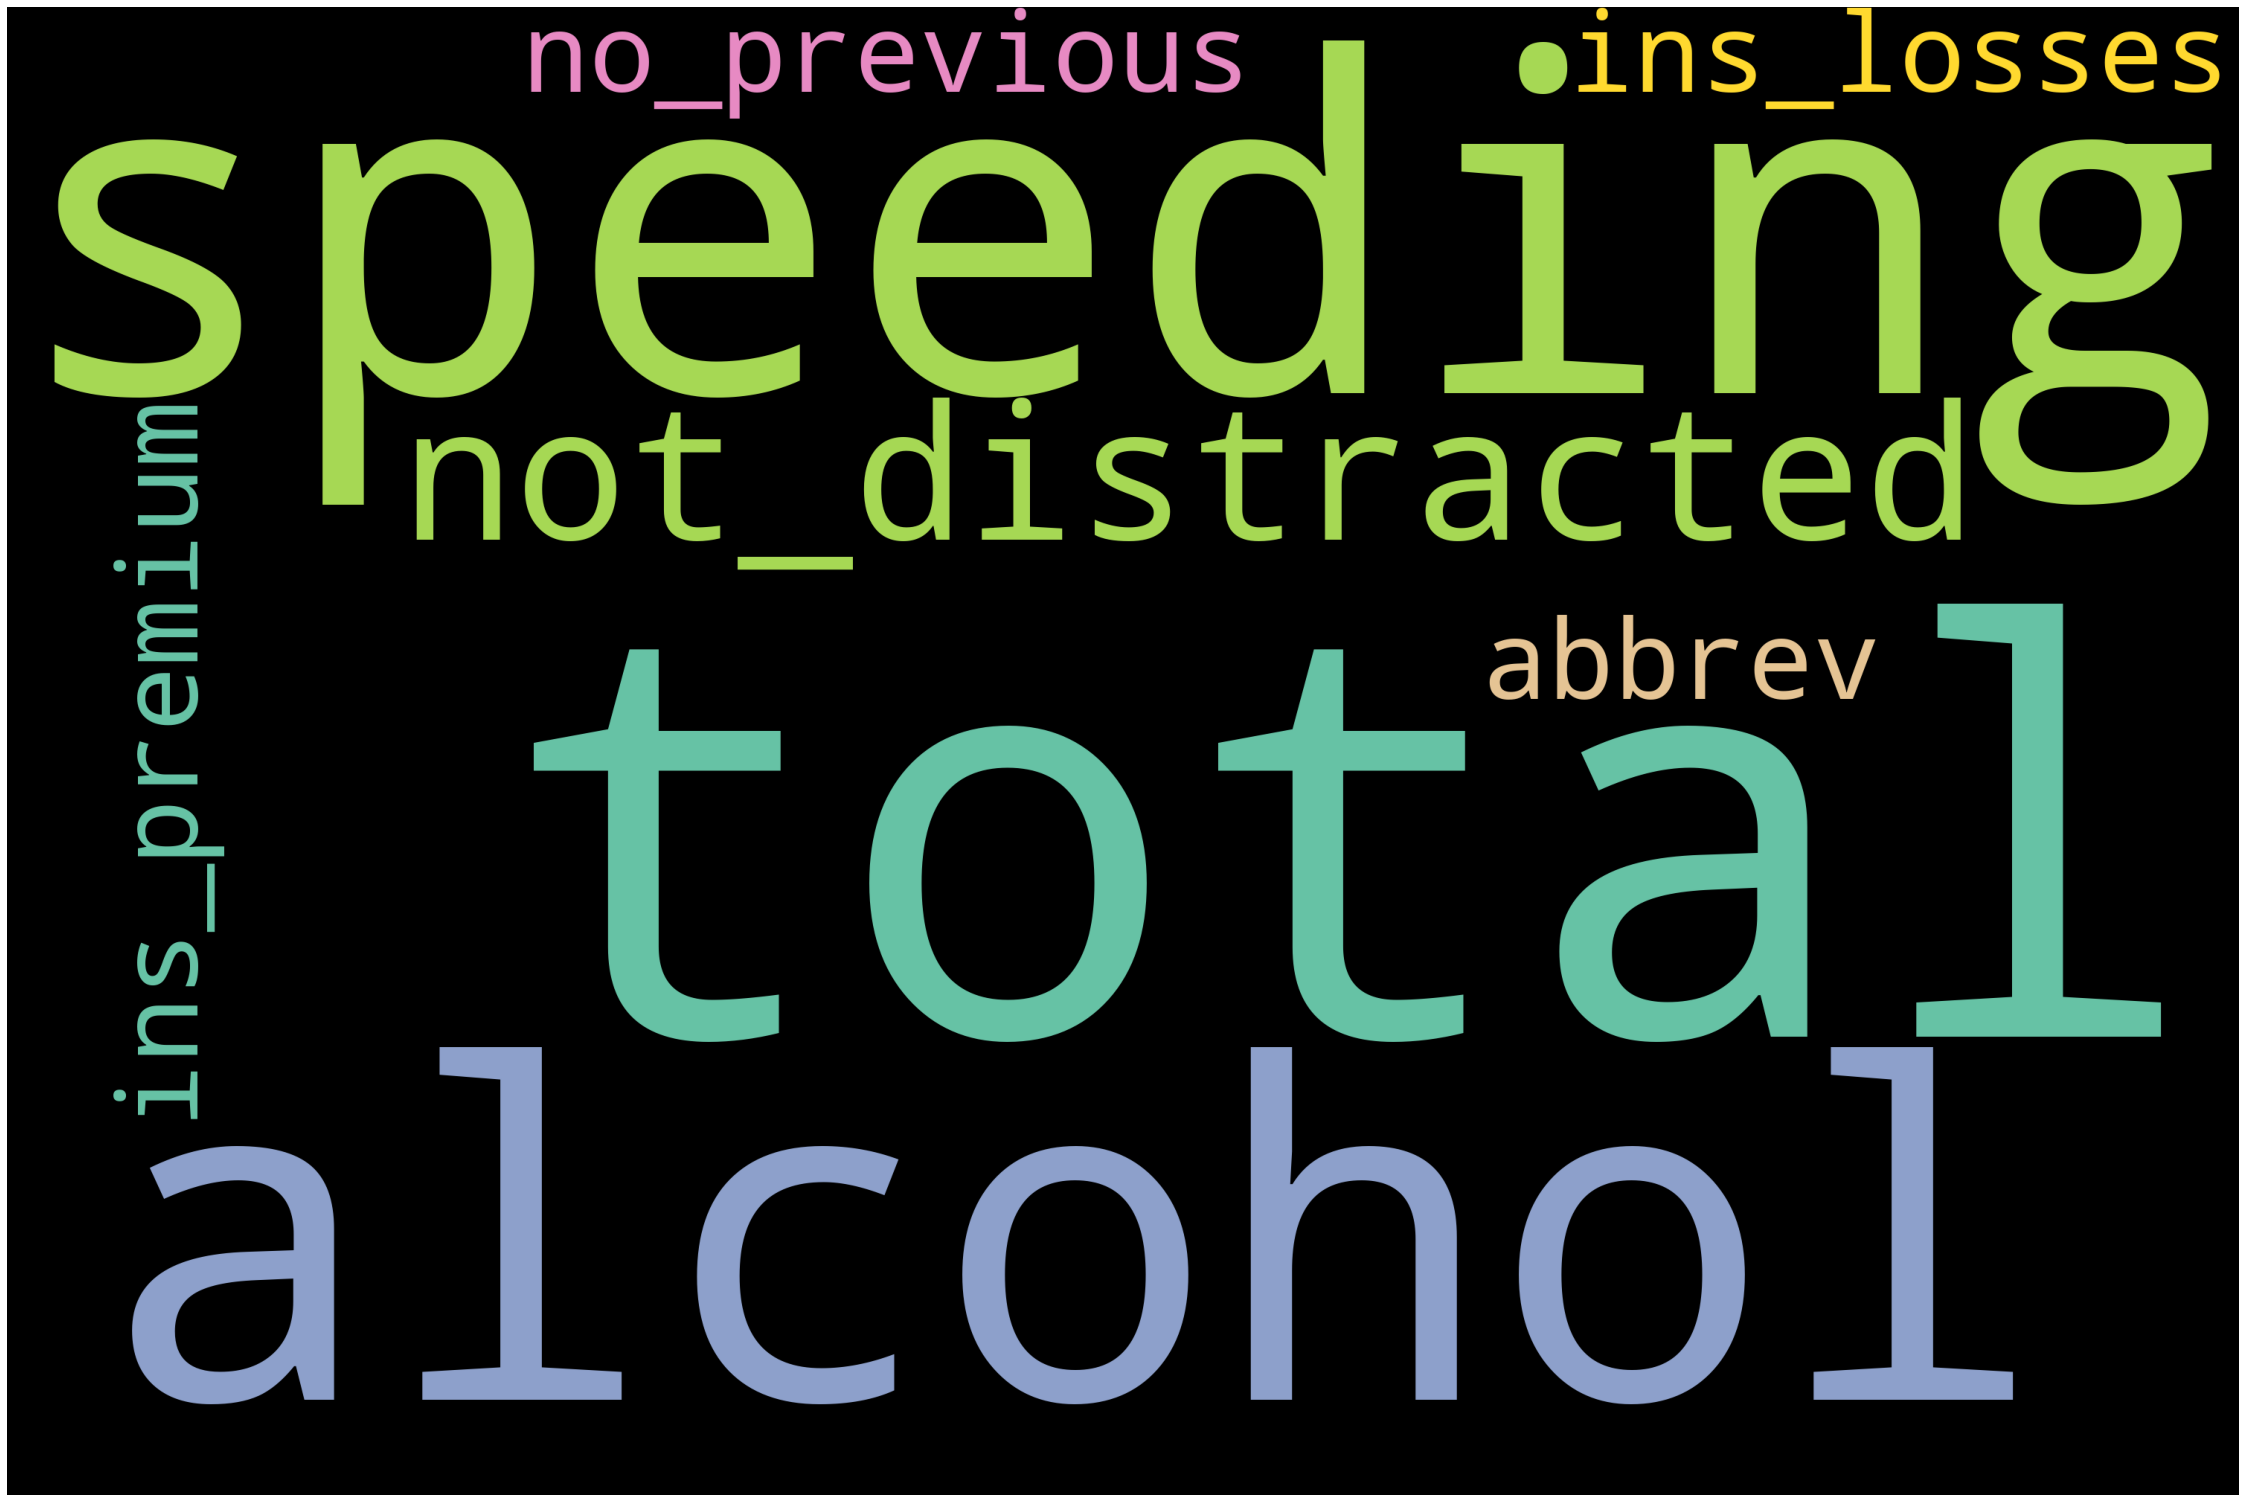

In [50]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)


#Save image
#wordcloud.to_file("wordcloud.png")


Here most of the reviews are neutral still negative reviews very less comparing to the postive.So from overall reviews we can conclude that its a good product